In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/healthcare_eda_dataset.csv"
df = pd.read_csv(file_path)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Blood_Pressure     4800 non-null   float64
 4   Cholesterol        4800 non-null   float64
 5   Diabetes           4034 non-null   object 
 6   Heart_Disease      5000 non-null   object 
 7   Smoking_Habit      3780 non-null   object 
 8   BMI                4800 non-null   float64
 9   Blood_Sugar_Level  4800 non-null   float64
 10  Billing_Amount     5000 non-null   float64
 11  Date_of_Admission  5000 non-null   object 
 12  Discharge_Date     5000 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 507.9+ KB


In [54]:
df.head(5)

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease,Smoking_Habit,BMI,Blood_Sugar_Level,Billing_Amount,Date_of_Admission,Discharge_Date
0,1,71,Female,111.0,163.0,Yes,No,Non-Smoker,29.7,130.4,4673.81,2015-01-01,2015-01-05
1,2,34,Male,136.0,NaN,Yes,Yes,Occasional,26.8,142.2,2045.02,2015-01-02,2015-01-06
2,3,80,Male,118.0,129.0,yes,No,Occasional,28.6,174.2,7635.90,2015-01-03,2015-01-07
3,4,40,Female,175.0,NaN,NaN,Yes,Occasional,32.2,97.5,2081.76,2015-01-04,2015-01-08
4,5,43,Female,134.0,252.0,no,No,NaN,38.6,121.8,5084.07,2015-01-05,2015-01-09


In [55]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Blood_Pressure,200
Cholesterol,200
Diabetes,966
Heart_Disease,0
Smoking_Habit,1220
BMI,200
Blood_Sugar_Level,200


In [56]:
df = df.drop(columns=["Smoking_Habit"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Blood_Pressure     4800 non-null   float64
 4   Cholesterol        4800 non-null   float64
 5   Diabetes           4034 non-null   object 
 6   Heart_Disease      5000 non-null   object 
 7   BMI                4800 non-null   float64
 8   Blood_Sugar_Level  4800 non-null   float64
 9   Billing_Amount     5000 non-null   float64
 10  Date_of_Admission  5000 non-null   object 
 11  Discharge_Date     5000 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 468.9+ KB


In [62]:
# Fill missing numerical values with the median
num_cols_to_fill = ["BMI", "Blood_Sugar_Level", "Blood_Pressure", "Cholesterol"]
for col in num_cols_to_fill:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values (Diabetes) with mode
df["Diabetes"] = df["Diabetes"].fillna(df["Diabetes"].mode()[0])

# Ensure logical consistency in date columns (Discharge Date > Admission Date)
df["Date_of_Admission"] = pd.to_datetime(df["Date_of_Admission"], errors="coerce")
df["Discharge_Date"] = pd.to_datetime(df["Discharge_Date"], errors="coerce")
df = df[df["Discharge_Date"] > df["Date_of_Admission"]]

# Remove duplicate records
df.drop_duplicates(inplace=True)

# Fix inconsistent gender values
df["Gender"] = df["Gender"].replace({"M": "Male", "F": "Female"}).str.capitalize()

# Standardizing Diabetes column (YES/NO)
df["Diabetes"] = df["Diabetes"].str.strip().str.upper()

<ipython-input-62-1e6dc45b3674>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Patient_ID         5000 non-null   int64         
 1   Age                5000 non-null   int64         
 2   Gender             5000 non-null   object        
 3   Blood_Pressure     5000 non-null   float64       
 4   Cholesterol        5000 non-null   float64       
 5   Diabetes           5000 non-null   object        
 6   Heart_Disease      5000 non-null   object        
 7   BMI                5000 non-null   float64       
 8   Blood_Sugar_Level  5000 non-null   float64       
 9   Billing_Amount     5000 non-null   float64       
 10  Date_of_Admission  5000 non-null   datetime64[ns]
 11  Discharge_Date     5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), object(3)
memory usage: 468.9+ KB


In [65]:
df.sample(10)

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease,BMI,Blood_Sugar_Level,Billing_Amount,Date_of_Admission,Discharge_Date
1119,1120,45,Male,134.0,169.0,NO,Yes,19.3,118.7,843.79,2018-01-24,2018-01-28
38,39,33,Female,106.0,290.0,NO,Yes,30.2,77.8,756.21,2015-02-08,2015-02-12
3740,3741,42,Other,146.0,201.0,YES,No,26.7,161.6,927.99,2025-03-29,2025-04-02
303,304,39,Male,139.0,186.0,YES,Yes,37.9,134.3,7015.67,2015-10-31,2015-11-04
1792,1793,63,Female,127.0,122.0,NO,No,25.9,77.4,3946.16,2019-11-28,2019-12-02
3474,3475,71,Male,109.0,239.0,YES,Yes,24.0,159.6,5303.15,2024-07-06,2024-07-10
4230,4231,40,Male,103.0,164.0,NO,Yes,30.6,112.8,7888.06,2026-08-01,2026-08-05
4378,4379,61,Female,95.0,129.0,NO,Yes,35.9,169.4,5147.65,2026-12-27,2026-12-31
421,422,40,Male,136.0,271.0,NO,Yes,37.9,114.4,7037.19,2016-02-26,2016-03-01
3131,3132,62,Other,151.0,228.0,YES,No,39.0,189.2,6024.12,2023-07-29,2023-08-02


<ipython-input-66-2c532e048166>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="coolwarm")


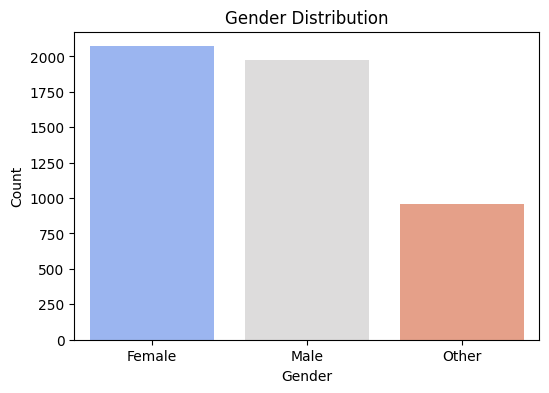

In [66]:
# ------------------- Visualization -------------------

# 1. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender", palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

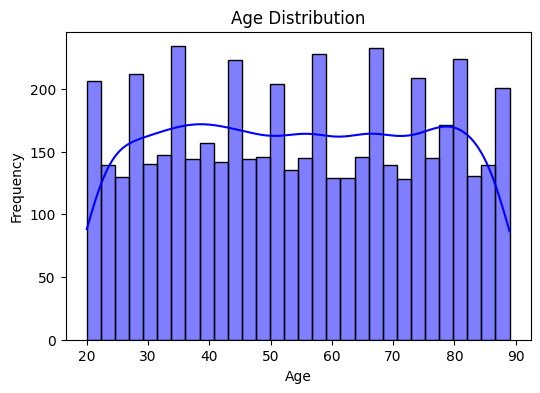

In [67]:
# 2. Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



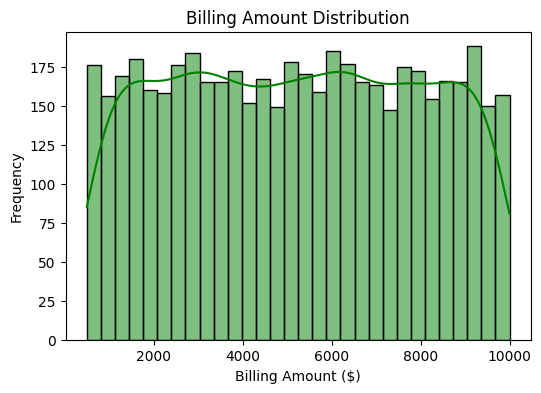

In [68]:
# 3. Billing Amount Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Billing_Amount"], bins=30, kde=True, color="green")
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount ($)")
plt.ylabel("Frequency")
plt.show()



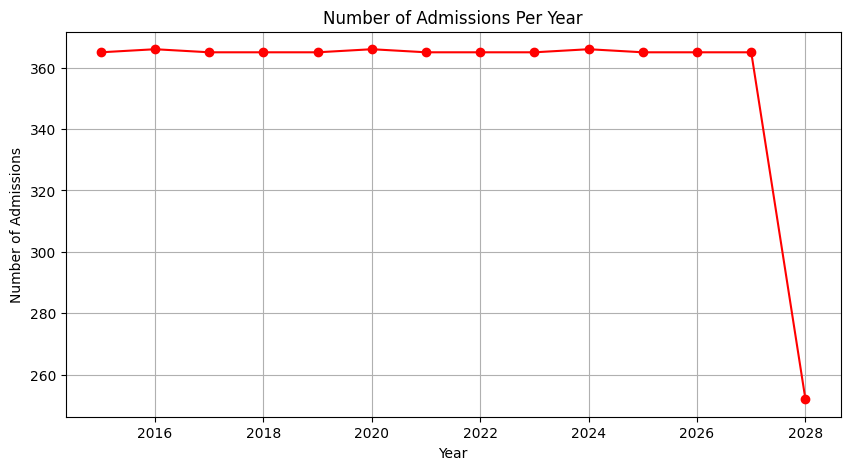

In [69]:
# 4. Admissions Over Time
plt.figure(figsize=(10, 5))
df["Date_of_Admission"].dt.year.value_counts().sort_index().plot(kind="line", marker="o", color="red")
plt.title("Number of Admissions Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.grid(True)
plt.show()

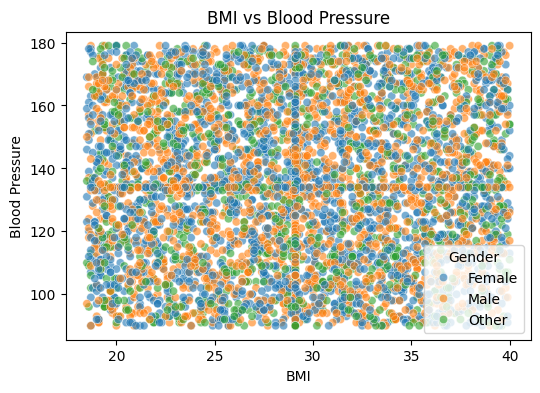

In [70]:
# 5. BMI vs. Blood Pressure Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="BMI", y="Blood_Pressure", hue="Gender", alpha=0.6)
plt.title("BMI vs Blood Pressure")
plt.xlabel("BMI")
plt.ylabel("Blood Pressure")
plt.show()

In [72]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Patient_ID,Age,Blood_Pressure,Cholesterol,BMI,Blood_Sugar_Level,Billing_Amount,Date_of_Admission,Discharge_Date
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000,5000
mean,2500.500000,54.478400,134.41660,200.520600,29.10904,134.954040,5223.751078,2021-11-04 12:00:00,2021-11-08 12:00:00
min,1.000000,20.000000,90.00000,100.000000,18.50000,70.000000,501.710000,2015-01-01 00:00:00,2015-01-05 00:00:00
25%,1250.750000,37.000000,113.00000,152.750000,24.10000,103.500000,2857.627500,2018-06-03 18:00:00,2018-06-07 18:00:00
50%,2500.500000,54.000000,134.00000,201.000000,29.10000,135.500000,5238.730000,2021-11-04 12:00:00,2021-11-08 12:00:00
75%,3750.250000,72.000000,156.00000,248.000000,34.10000,165.800000,7589.152500,2025-04-07 06:00:00,2025-04-11 06:00:00
max,5000.000000,89.000000,179.00000,299.000000,40.00000,200.000000,9993.050000,2028-09-08 00:00:00,2028-09-12 00:00:00
std,1443.520003,20.091746,25.48687,56.702302,5.99830,36.854834,2738.992660,NaN,NaN
